I collected yenta data from twitter. Yenta is service that provides business matching. If we use yenta, it sends us report about our activitiy and performance date after aggregated. 

In [67]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
plt.style.use('seaborn-darkgrid')

In [68]:
df = pd.read_csv('yenta.csv')
df.gender = df.gender.replace('male', 0)
df.gender = df.gender.replace('female', 1)
df.head()

,gender,age,job,is_staff,cnt,male,female,under_21,22_25,26_30,...,top_2,top_3,top_4,top_5,top_1_cnt,top_2_cnt,top_3_cnt,top_4_cnt,top_5_cnt,length
0,0,22,designer,1,266,239,27,9,62,69,...,sales,marketing,pm,strategist,104,94,87,77,73,11
1,0,33,marketer,0,302,274,28,3,20,82,...,ceo,strategist,sales,pm,132,123,98,96,93,12
2,0,24,engineer marketer,0,1414,1304,110,19,199,337,...,sales,marketing,strategist,pm,498,471,467,430,335,12
3,0,34,cto,1,3030,2608,422,43,410,703,...,ceo,sales,strategist,pm,973,924,898,767,736,12
4,0,39,back-office,0,575,532,43,1,45,154,...,marketing,strategist,sales,pm,255,241,198,195,178,12


In [85]:
df.drop(['gender', 'is_staff'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,21.0,860.095238,771.872069,68.0,302.0,575.0,1414.0,3030.0
male,21.0,775.666667,679.338894,60.0,274.0,532.0,1295.0,2608.0
female,21.0,84.285714,97.507509,4.0,25.0,44.0,110.0,422.0
under_21,21.0,9.666667,11.270907,0.0,3.0,4.0,12.0,43.0
22_25,21.0,104.714286,106.478703,9.0,32.0,62.0,164.0,410.0
26_30,21.0,205.809524,175.776739,18.0,82.0,154.0,334.0,703.0
31_35,21.0,180.904762,155.974326,13.0,81.0,128.0,296.0,604.0
36_40,21.0,106.142857,93.871341,8.0,35.0,79.0,154.0,373.0
41_45,21.0,47.857143,45.474483,3.0,13.0,26.0,83.0,165.0
over_46,21.0,23.809524,23.148691,3.0,4.0,16.0,34.0,91.0


umm... confusing.

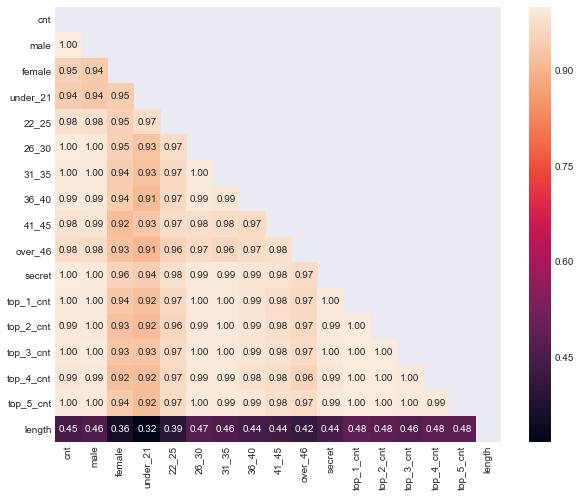

In [70]:
corr = df.drop(['gender', 'is_staff'], axis=1).corr()
mask = np.where(np.triu(np.ones_like(corr)), True, False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt='1.2f')

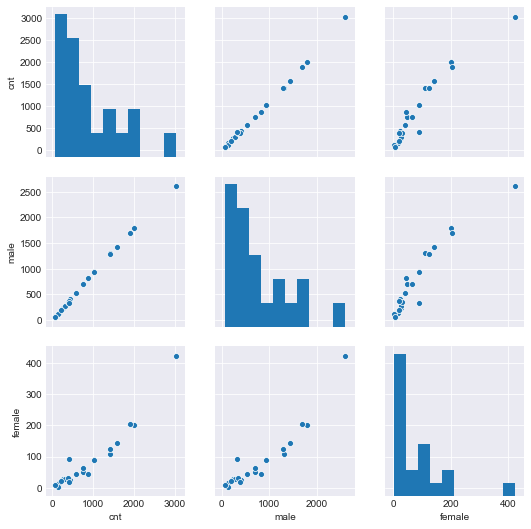

In [137]:
sns.pairplot(df[['cnt', 'male', 'female']])
plt.savefig('gender')
plt.show()

As the above, the number of male increase linear to cnt, but female a little exponential. Of course, we should consider diffrence of scale between male and female.

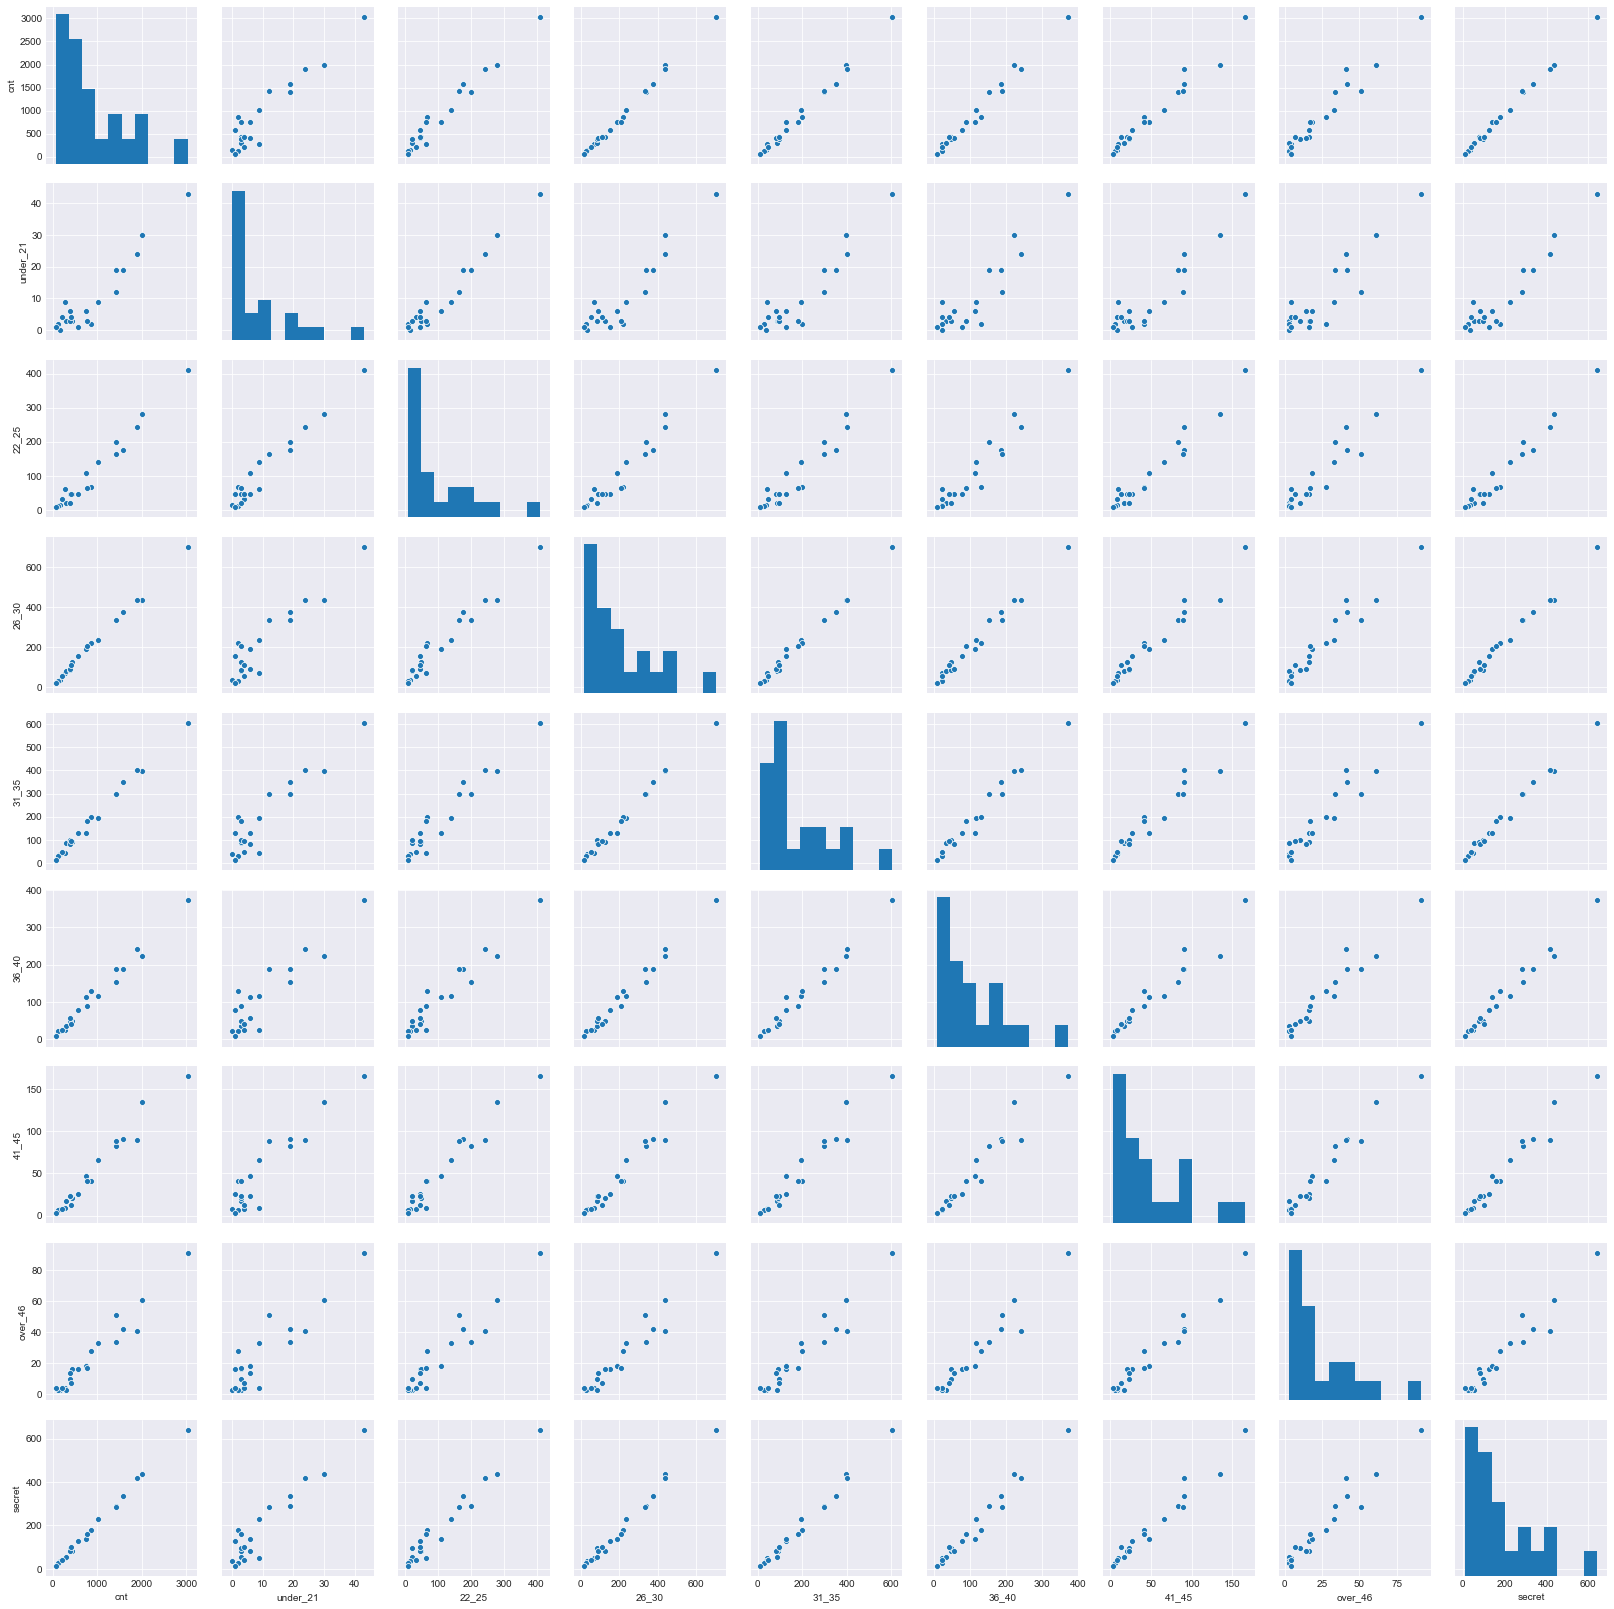

In [72]:
sns.pairplot(df[['cnt', 'under_21', '22_25', '26_30', '31_35', '36_40', '41_45', 'over_46', 'secret']])

it seems that all generation raise linear to cnt and strength correlation to others. This is because total count is composed by sum of all generations. 

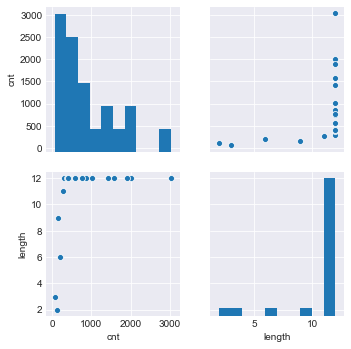

In [73]:
sns.pairplot(df[['cnt', 'length']])

I cannot explain the relationship between total count and usage lenth enough because I have a few under 12 length sample.

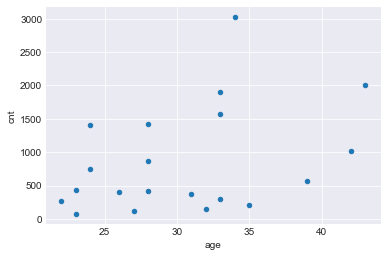

In [74]:
df1 = df.drop(13)
df1.age = df1.age.astype(int)
df1[['cnt', 'age']].plot(kind='scatter', x='age', y='cnt')

Humm... it's not good signal. Let's see distribution of generation. 

In [83]:
generation = df[['cnt', 'under_21', '22_25', '26_30', '31_35', '36_40', '41_45', 'over_46', 'secret']]
generation.describe()

,cnt,under_21,22_25,26_30,31_35,36_40,41_45,over_46,secret
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,860.095238,9.666667,104.714286,205.809524,180.904762,106.142857,47.857143,23.809524,181.190476
std,771.872069,11.270907,106.478703,175.776739,155.974326,93.871341,45.474483,23.148691,165.689354
min,68.000000,0.000000,9.000000,18.000000,13.000000,8.000000,3.000000,3.000000,12.000000
25%,302.000000,3.000000,32.000000,82.000000,81.000000,35.000000,13.000000,4.000000,54.000000
50%,575.000000,4.000000,62.000000,154.000000,128.000000,79.000000,26.000000,16.000000,126.000000
75%,1414.000000,12.000000,164.000000,334.000000,296.000000,154.000000,83.000000,34.000000,284.000000
max,3030.000000,43.000000,410.000000,703.000000,604.000000,373.000000,165.000000,91.000000,641.000000


Real values are troublesome because each values highly depends on total count. I'm not interested in the quantative but the ratio of each segments. Therefore, I noramlize each values by user total values, so-called min-max normalization. 

In [76]:
generation = generation.astype('float')
norm_generation = (generation.drop('cnt', axis=1).T / generation['cnt'])
norm_generation.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
under_21,0.033835,0.009934,0.013437,0.014191,0.001739,0.008832,0.008000,0.006961,0.000000,0.002309,...,0.015873,0.018779,0.003942,0.007874,0.0150,0.015113,0.008457,0.009592,0.014706,0.012652
22_25,0.233083,0.066225,0.140736,0.135314,0.078261,0.136408,0.144000,0.109049,0.090909,0.077367,...,0.079365,0.150235,0.082786,0.052493,0.1400,0.115869,0.115574,0.107914,0.132353,0.128624
26_30,0.259398,0.271523,0.238331,0.232013,0.267826,0.228656,0.253333,0.292343,0.214286,0.255196,...,0.222222,0.248826,0.272011,0.220472,0.2180,0.224181,0.235377,0.268585,0.264706,0.230364
31_35,0.154135,0.291391,0.212164,0.199340,0.222609,0.190383,0.170667,0.208817,0.253247,0.227483,...,0.230159,0.230047,0.236531,0.257218,0.1985,0.204030,0.208598,0.225420,0.191176,0.211386
36_40,0.090226,0.115894,0.108911,0.123102,0.137391,0.114818,0.152000,0.111369,0.149351,0.150115,...,0.174603,0.112676,0.118265,0.125984,0.1115,0.143577,0.133192,0.100719,0.117647,0.127570


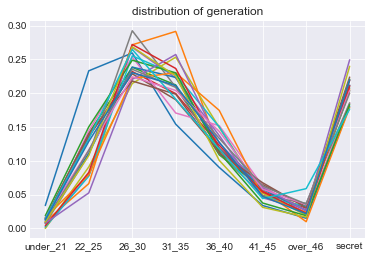

In [144]:
norm_generation.plot(legend=False, title='distribution of generation')
plt.xticks(range(norm_generation.index.size), norm_generation.index)
plt.savefig('generation_with_secret')
plt.show()

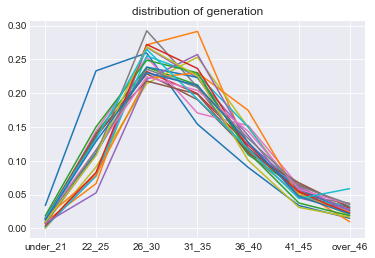

In [143]:
tmp = norm_generation.drop('secret')
tmp.plot(legend=False, title='distribution of generation')
plt.xticks(range(tmp.index.size), tmp.index)
plt.savefig('generation')
plt.show()

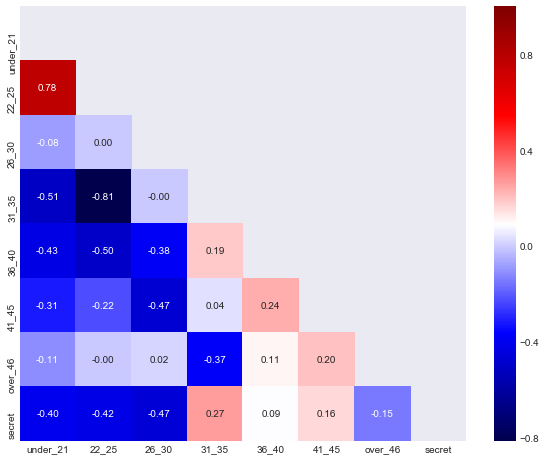

In [79]:
corr = norm_generation.T.corr()
mask = np.where(np.triu(np.ones_like(corr)), True, False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt='1.2f', cmap='seismic')

In [80]:
job = df.T.loc['top_1': 'top_5_cnt'].T
job.head()

,top_1,top_2,top_3,top_4,top_5,top_1_cnt,top_2_cnt,top_3_cnt,top_4_cnt,top_5_cnt
0,ceo,sales,marketing,pm,strategist,104,94,87,77,73
1,marketing,ceo,strategist,sales,pm,132,123,98,96,93
2,ceo,sales,marketing,strategist,pm,498,471,467,430,335
3,marketing,ceo,sales,strategist,pm,973,924,898,767,736
4,ceo,marketing,strategist,sales,pm,255,241,198,195,178


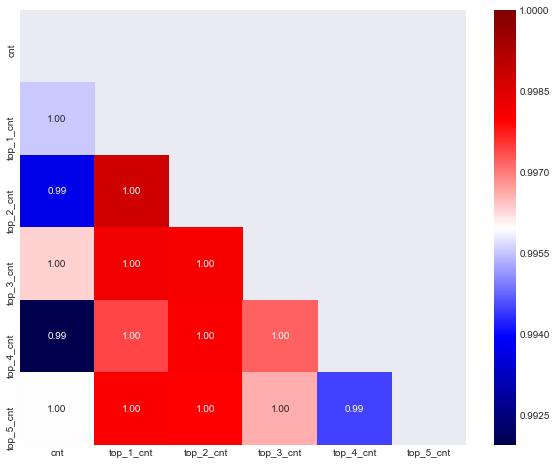

In [81]:
corr = df[['cnt', 'top_1_cnt', 'top_2_cnt', 'top_3_cnt', 'top_4_cnt', 'top_5_cnt']].corr()
mask = np.where(np.triu(np.ones_like(corr)), True, False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt='1.2f', cmap='seismic')

In [82]:
top1 = df['top_1']
pd.get_dummies(top1).sum()

ceo          12
marketing     8
sales         1
dtype: int64

In [134]:
tops = df[['top_1', 'top_2', 'top_3', 'top_4', 'top_5']]
tmp = []
for i, t in enumerate(['top_1', 'top_2', 'top_3', 'top_4', 'top_5']):
    series = df[t]
    tmp.append(pd.get_dummies(series).sum().to_dict())
job = pd.DataFrame(tmp).fillna(0).astype(int)
job.index = np.arange(1, 6)
job = job.T / job.sum(axis=1)
job.T

,ceo,consultant,director,engineer,hr,marketing,pm,sales,strategist
1,0.571429,0.000000,0.000000,0.000000,0.000000,0.380952,0.000000,0.047619,0.000000
2,0.380952,0.000000,0.000000,0.000000,0.000000,0.476190,0.000000,0.142857,0.000000
3,0.047619,0.000000,0.000000,0.047619,0.047619,0.142857,0.000000,0.380952,0.333333
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.333333,0.571429
5,0.000000,0.095238,0.095238,0.000000,0.000000,0.000000,0.666667,0.047619,0.095238


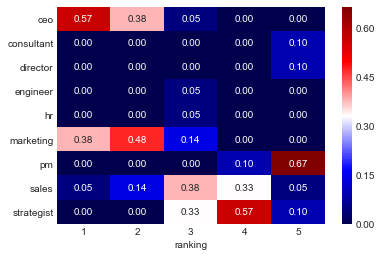

In [136]:
sns.heatmap(job, annot=True, fmt='1.2f', cmap='seismic')
plt.xlabel('ranking')
plt.savefig('ranking')
plt.show()

In [142]:
tmp = df[['male', 'female']]
tmp = tmp.T / tmp.sum(axis=1)
tmp.T.describe()

,male,female
count,21.000000,21.000000
mean,0.907744,0.092256
std,0.038206,0.038206
min,0.781775,0.031746
25%,0.896714,0.074783
50%,0.911678,0.088322
75%,0.925217,0.103286
max,0.968254,0.218225
